In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,6,0,3,"Moran, Mr. James",male,30.703504,0,0,330877,8.4583,Q


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare
count,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,8.840000e+02,884.000000
mean,446.986425,0.383484,2.307692,29.669612,0.527149,0.384615,5.701547e+05,32.269117
std,256.976831,0.486510,0.835446,12.992741,1.106118,0.808527,2.705471e+06,49.784295
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,3.000000e+00,0.000000
25%,224.750000,0.000000,2.000000,22.000000,0.000000,0.000000,1.487900e+04,7.925000
50%,447.500000,0.000000,3.000000,30.000000,0.000000,0.000000,1.120585e+05,14.456250
75%,669.250000,1.000000,3.000000,35.000000,1.000000,0.000000,3.470820e+05,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,2.310129e+07,512.329200


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  884 non-null    int64  
 1   Survived     884 non-null    int64  
 2   Pclass       884 non-null    int64  
 3   Name         884 non-null    object 
 4   Sex          884 non-null    object 
 5   Age          884 non-null    float64
 6   SibSp        884 non-null    int64  
 7   Parch        884 non-null    int64  
 8   Ticket       884 non-null    int64  
 9   Fare         884 non-null    float64
 10  Embarked     884 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.1+ KB


In [8]:
data.shape

(884, 11)

In [11]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [10]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [12]:
y_col = 'Fare'
x_col = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Embarked']

In [13]:
x = data[x_col]
y = data[y_col]

x_train, y_train, x_test, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [14]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

ValueError: Found input variables with inconsistent numbers of samples: [618, 266]

C:\Users\abejr\AppData\Local\Temp\ipykernel_28592\2952673687.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names)


ValueError: Dimensions of labels and X must be compatible

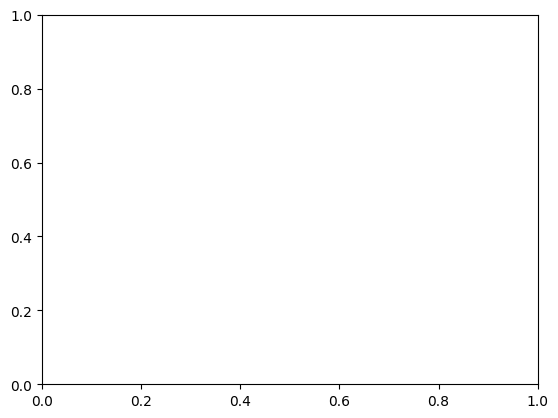

In [15]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()